In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

In [26]:
tr_columns = ['S','L','D']
gd_columns = ['H','W','SW','VW','ShW']
df = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns)
tf = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols='R')

In [27]:
def sex_class(value):
    if value == 'M':
        return 1
    elif value == 'F':
        return 2
    else:
        return 3
    
def age_class(value):
    if value == 1:
        return 'Young'
    elif value == 2:
        return 'Middle-Aged'
    else:
        return 'Old'

In [28]:
gnb = GaussianNB()

In [29]:
data_file = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns)
data_file_2 = pd.read_csv('abalone_dataset.csv', sep=',', header=0, usecols=tr_columns + gd_columns)
data_file['S'] = data_file['S'].apply(sex_class, 'S')



In [30]:
def problem_solver(tr_set_count, file_name):
    
    tr_set = np.array(data_file[:tr_set_count])
    target = tf[:tr_set_count]
    val_set = np.array(data_file[tr_set_count + 1:])
    val_target = tf[tr_set_count + 1:]
    
    y_fit = gnb.fit(tr_set, target)
    y_pred = y_fit.predict(val_set)
    y_score = gnb.score(tr_set, target)
    con_matrix = confusion_matrix(val_target, y_pred)
    
    return y_pred, con_matrix, y_score

In [58]:
a,b,c = problem_solver(100, data_file)

/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/validation.py:449: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
b

array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]])

In [60]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #tick_marks = np.arange(len(iris.target_names))
    #plt.xticks(tick_marks, iris.target_names, rotation=45)
    #plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


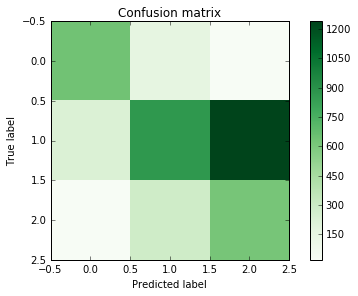

In [61]:
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(b)

In [62]:
c

0.68999999999999995

JoblibIndexError: JoblibIndexError
___________________________________________________________________________
Multiprocessing exception:
    ...........................................................................
/usr/lib/python2.7/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    157     pkg_name = mod_name.rpartition('.')[0]
    158     main_globals = sys.modules["__main__"].__dict__
    159     if alter_argv:
    160         sys.argv[0] = fname
    161     return _run_code(code, main_globals, None,
--> 162                      "__main__", fname, loader, pkg_name)
        fname = '/home/halilbay/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = 'ipykernel'
    163 
    164 def run_module(mod_name, init_globals=None,
    165                run_name=None, alter_sys=False):
    166     """Execute a module's code without importing it

...........................................................................
/usr/lib/python2.7/runpy.py in _run_code(code=<code object <module> at 0x7fc6e1380930, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/halilbay/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/halilb...python2.7/site-packages/ipykernel/kernelapp.pyc'>}, init_globals=None, mod_name='__main__', mod_fname='/home/halilbay/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='ipykernel')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0x7fc6e1380930, file "/...2.7/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': None, '__file__': '/home/halilbay/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': 'ipykernel', 'app': <module 'ipykernel.kernelapp' from '/home/halilb...python2.7/site-packages/ipykernel/kernelapp.pyc'>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
/home/halilbay/.virtualenvs/ml/lib/python2.7/site-packages/ipykernel/__main__.py in <module>()
      1 
      2 
----> 3 
      4 if __name__ == '__main__':
      5     from ipykernel import kernelapp as app
      6     app.launch_new_instance()
      7 
      8 
      9 
     10 

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    587         
    588         If a global instance already exists, this reinitializes and starts it
    589         """
    590         app = cls.instance(**kwargs)
    591         app.initialize(argv)
--> 592         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    593 
    594 #-----------------------------------------------------------------------------
    595 # utility functions, for convenience
    596 #-----------------------------------------------------------------------------

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    398         
    399         if self.poller is not None:
    400             self.poller.start()
    401         self.kernel.start()
    402         try:
--> 403             ioloop.IOLoop.instance().start()
    404         except KeyboardInterrupt:
    405             pass
    406 
    407 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    146             PollIOLoop.configure(ZMQIOLoop)
    147         return PollIOLoop.instance()
    148     
    149     def start(self):
    150         try:
--> 151             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    152         except ZMQError as e:
    153             if e.errno == ETERM:
    154                 # quietly return on ETERM
    155                 pass

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    861                 self._events.update(event_pairs)
    862                 while self._events:
    863                     fd, events = self._events.popitem()
    864                     try:
    865                         fd_obj, handler_func = self._handlers[fd]
--> 866                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    867                     except (OSError, IOError) as e:
    868                         if errno_from_exception(e) == errno.EPIPE:
    869                             # Happens when the client closes the connection
    870                             pass

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    428             # dispatch events:
    429             if events & IOLoop.ERROR:
    430                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    431                 return
    432             if events & IOLoop.READ:
--> 433                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    434                 if not self.socket:
    435                     return
    436             if events & IOLoop.WRITE:
    437                 self._handle_send()

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    460                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    461         else:
    462             if self._recv_callback:
    463                 callback = self._recv_callback
    464                 # self._recv_callback = None
--> 465                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    466                 
    467         # self.update_state()
    468         
    469 

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    402         close our socket."""
    403         try:
    404             # Use a NullContext to ensure that all StackContexts are run
    405             # inside our blanket exception handler rather than outside.
    406             with stack_context.NullContext():
--> 407                 callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    408         except:
    409             gen_log.error("Uncaught exception, closing connection.",
    410                           exc_info=True)
    411             # Close the socket on an uncaught exception from a user callback

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    270         # Fast path when there are no active contexts.
    271         def null_wrapper(*args, **kwargs):
    272             try:
    273                 current_state = _state.contexts
    274                 _state.contexts = cap_contexts[0]
--> 275                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    276             finally:
    277                 _state.contexts = current_state
    278         null_wrapper._wrapped = True
    279         return null_wrapper

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    255         if self.control_stream:
    256             self.control_stream.on_recv(self.dispatch_control, copy=False)
    257 
    258         def make_dispatcher(stream):
    259             def dispatcher(msg):
--> 260                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    261             return dispatcher
    262 
    263         for s in self.shell_streams:
    264             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2015-11-12T01:21:26.024452', u'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', u'msg_type': u'execute_request', u'session': u'99E06BBC36104F788A8FC9884229EC44', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', 'msg_type': u'execute_request', 'parent_header': {}})
    207             self.log.error("UNKNOWN MESSAGE TYPE: %r", msg_type)
    208         else:
    209             self.log.debug("%s: %s", msg_type, msg)
    210             self.pre_handler_hook()
    211             try:
--> 212                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['99E06BBC36104F788A8FC9884229EC44']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2015-11-12T01:21:26.024452', u'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', u'msg_type': u'execute_request', u'session': u'99E06BBC36104F788A8FC9884229EC44', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', 'msg_type': u'execute_request', 'parent_header': {}}
    213             except Exception:
    214                 self.log.error("Exception in message handler:", exc_info=True)
    215             finally:
    216                 self.post_handler_hook()

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['99E06BBC36104F788A8FC9884229EC44'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)', u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {'date': '2015-11-12T01:21:26.024452', u'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', u'msg_type': u'execute_request', u'session': u'99E06BBC36104F788A8FC9884229EC44', u'username': u'username', u'version': u'5.0'}, 'metadata': {}, 'msg_id': u'BFDE18851D4F4FE9860344CEBE46F15C', 'msg_type': u'execute_request', 'parent_header': {}})
    365         if not silent:
    366             self.execution_count += 1
    367             self._publish_execute_input(code, parent, self.execution_count)
    368 
    369         reply_content = self.do_execute(code, silent, store_history,
--> 370                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    371 
    372         # Flush output before sending the reply.
    373         sys.stdout.flush()
    374         sys.stderr.flush()

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    170 
    171         reply_content = {}
    172         # FIXME: the shell calls the exception handler itself.
    173         shell._reply_content = None
    174         try:
--> 175             shell.run_cell(code, store_history=store_history, silent=silent)
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)'
        store_history = True
        silent = False
    176         except:
    177             status = u'error'
    178             # FIXME: this code right now isn't being used yet by default,
    179             # because the run_cell() call above directly fires off exception

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u'estimator = GaussianNB()\ntr_set = np.array(da...timator, title, tr_set, target, cv=cv, n_jobs=4)', store_history=True, silent=False, shell_futures=True)
   2897                 self.displayhook.exec_result = result
   2898 
   2899                 # Execute the user code
   2900                 interactivity = "none" if silent else self.ast_node_interactivity
   2901                 self.run_ast_nodes(code_ast.body, cell_name,
-> 2902                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2903 
   2904                 # Reset this so later displayed values do not modify the
   2905                 # ExecutionResult
   2906                 self.displayhook.exec_result = None

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Expr object>], cell_name='<ipython-input-24-0c19b326a4be>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3007                     return True
   3008 
   3009             for i, node in enumerate(to_run_interactive):
   3010                 mod = ast.Interactive([node])
   3011                 code = compiler(mod, cell_name, "single")
-> 3012                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7fc6b380d130, file "<ipython-input-24-0c19b326a4be>", line 4>
        result = <IPython.core.interactiveshell.ExecutionResult object>
   3013                     return True
   3014 
   3015             # Flush softspace
   3016             if softspace(sys.stdout, 0):

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7fc6b380d130, file "<ipython-input-24-0c19b326a4be>", line 4>, result=<IPython.core.interactiveshell.ExecutionResult object>)
   3061         outflag = 1  # happens in more places, so it's easier as default
   3062         try:
   3063             try:
   3064                 self.hooks.pre_run_code_hook()
   3065                 #rprint('Running code', repr(code_obj)) # dbg
-> 3066                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7fc6b380d130, file "<ipython-input-24-0c19b326a4be>", line 4>
        self.user_global_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', u'def plot_learning_curve(estimator, title, X, y...")\n\n    plt.legend(loc="best")\n    return plt', u"get_ipython().magic(u'matplotlib inline')\nimp...rom sklearn.learning_curve import learning_curve", u"tr_columns = ['S','L','D']\ngd_columns = ['H',...ne_dataset.csv', sep=',', header=0, usecols='R')", u"def sex_class(value):\n    if value == 'M':\n ...n 'Middle-Aged'\n    else:\n        return 'Old'", u'gnb = GaussianNB()', u"data_file = pd.read_csv('abalone_dataset.csv',...file['S'] = data_file['S'].apply(sex_class, 'S')", u'def problem_solver(tr_set_count, file_name):\n... %s" % con_matrix\n    return y_pred, con_matrix', u'a,b = problem_solver(100, data_file_2)', u'b', u'def problem_solver(tr_set_count, file_name):\n... %s" % con_matrix\n    return y_pred, con_matrix', u'a,b = problem_solver(100, data_file_2)', u'b', u"def plot_confusion_matrix(cm, title='Confusion...'True label')\n    plt.xlabel('Predicted label')", u'np.set_printoptions(precision=2)\nplt.figure()\nplot_confusion_matrix(b)', u'\nplt.show()', u'def plot_learning_curve(estimator, title, X, y...")\n\n    plt.legend(loc="best")\n    return plt', u'title = "Learning Curves (Naive Bayes)"', u'len(np.array(data_file_2))', u'cv = cross_validation.ShuffleSplit(digits.data...                 test_size=0.97, random_state=0)', ...], 'Out': {12: array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), 18: 4177}, '_': 4177, '_12': array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), '_18': 4177, '__': array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), '___': '', '__builtin__': <module '__builtin__' (built-in)>, '__builtins__': <module '__builtin__' (built-in)>, ...}
        self.user_ns = {'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', u'def plot_learning_curve(estimator, title, X, y...")\n\n    plt.legend(loc="best")\n    return plt', u"get_ipython().magic(u'matplotlib inline')\nimp...rom sklearn.learning_curve import learning_curve", u"tr_columns = ['S','L','D']\ngd_columns = ['H',...ne_dataset.csv', sep=',', header=0, usecols='R')", u"def sex_class(value):\n    if value == 'M':\n ...n 'Middle-Aged'\n    else:\n        return 'Old'", u'gnb = GaussianNB()', u"data_file = pd.read_csv('abalone_dataset.csv',...file['S'] = data_file['S'].apply(sex_class, 'S')", u'def problem_solver(tr_set_count, file_name):\n... %s" % con_matrix\n    return y_pred, con_matrix', u'a,b = problem_solver(100, data_file_2)', u'b', u'def problem_solver(tr_set_count, file_name):\n... %s" % con_matrix\n    return y_pred, con_matrix', u'a,b = problem_solver(100, data_file_2)', u'b', u"def plot_confusion_matrix(cm, title='Confusion...'True label')\n    plt.xlabel('Predicted label')", u'np.set_printoptions(precision=2)\nplt.figure()\nplot_confusion_matrix(b)', u'\nplt.show()', u'def plot_learning_curve(estimator, title, X, y...")\n\n    plt.legend(loc="best")\n    return plt', u'title = "Learning Curves (Naive Bayes)"', u'len(np.array(data_file_2))', u'cv = cross_validation.ShuffleSplit(digits.data...                 test_size=0.97, random_state=0)', ...], 'Out': {12: array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), 18: 4177}, '_': 4177, '_12': array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), '_18': 4177, '__': array([[ 636,  164,   20],
       [ 220,  871, 1239],
       [  24,  286,  616]]), '___': '', '__builtin__': <module '__builtin__' (built-in)>, '__builtins__': <module '__builtin__' (built-in)>, ...}
   3067             finally:
   3068                 # Reset our crash handler in place
   3069                 sys.excepthook = old_excepthook
   3070         except SystemExit as e:

...........................................................................
/home/halilbay/Desktop/halilbay/bishop - ml/hw1/<ipython-input-24-0c19b326a4be> in <module>()
      1 
      2 
      3 estimator = GaussianNB()
----> 4 tr_set = np.array(data_file_2[:100])
      5 target = tf[:100]
      6 plot_learning_curve(estimator, title, tr_set, target, cv=cv, n_jobs=4)
      7 
      8 
      9 
     10 

...........................................................................
/home/halilbay/Desktop/halilbay/bishop - ml/hw1/<ipython-input-16-dec0bb9615ad> in plot_learning_curve(estimator=GaussianNB(), title='Learning Curves (Naive Bayes)', X=array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245,...25, 0.5785, 0.2775, 0.085, 0.155]], dtype=object), y=    R
0   3
1   1
2   2
3   2
4   1
5   2
6   3
...3
96  2
97  2
98  1
99  2

[100 rows x 1 columns], ylim=None, cv=ShuffleSplit(4177, n_iter=4177, test_size=0.97, random_state=0), n_jobs=4, train_sizes=array([ 0.1 ,  0.33,  0.55,  0.78,  1.  ]))
     35     if ylim is not None:
     36         plt.ylim(*ylim)
     37     plt.xlabel("Training examples")
     38     plt.ylabel("Score")
     39     train_sizes, train_scores, test_scores = learning_curve(
---> 40         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
     41     train_scores_mean = np.mean(train_scores, axis=1)
     42     train_scores_std = np.std(train_scores, axis=1)
     43     test_scores_mean = np.mean(test_scores, axis=1)
     44     test_scores_std = np.std(test_scores, axis=1)

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/learning_curve.py in learning_curve(estimator=GaussianNB(), X=array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245,...25, 0.5785, 0.2775, 0.085, 0.155]], dtype=object), y=    R
0   3
1   1
2   2
3   2
4   1
5   2
6   3
...3
96  2
97  2
98  1
99  2

[100 rows x 1 columns], train_sizes=array([ 0.1 ,  0.33,  0.55,  0.78,  1.  ]), cv=[(array([1304, 2334, 3661, 2536, 2492, 1208, 1395,... 705, 3468, 1033,
       3264, 1653, 2607, 2732]), array([ 668, 1580, 3784, ..., 3587,  770,  637])), (array([ 941, 2386, 4101, 3037, 1720, 4099,   26,...4021, 3377,  823,
       3068, 2743,  566, 1033]), array([3972, 1091,   52, ..., 2435,  246, 3745])), (array([3171,  688, 2519, 1397,  629, 1249, 2743,...1815, 2758,  283,
       2463, 1148, 1888, 1779]), array([1432, 1019, 3196, ..., 1728, 3494, 2499])), (array([1429, 1825, 1916, 2507,  108, 2577,  911,...3814, 3109, 3716,
       3637, 1278,  897, 3966]), array([3688, 3933, 1125, ..., 3537,  334, 2072])), (array([ 237, 3559, 3067, 1896, 3609, 1519, 2946,...1698, 2850, 2071,
       3789, 1209, 1554, 2113]), array([  56,   62, 3309, ..., 3149, 2683, 2932])), (array([1248, 1874, 1720, 1554, 2354, 3494, 1925,...2845, 1381, 1030,
       3184, 1994, 3195, 2805]), array([  69, 1385, 1418, ...,  960, 1752, 2214])), (array([3443, 3276, 2158, 1434,  737, 2355, 1992,...1914, 2256, 3711,
       2313, 2011, 1018,  733]), array([ 151, 1299, 1176, ..., 1136, 2114, 2607])), (array([1979, 3445, 3702, 2927, 2195,  324, 2699,...3296,  419, 2369,
       3292, 4063, 3336,  864]), array([1522,  415,  391, ...,  886, 1732, 2218])), (array([3441, 3390, 3548, 3500, 3410, 2853, 1318,...4122, 3193,  888,
       4001,  207,  609,  668]), array([3769, 2419, 3499, ...,  934, 3308, 3011])), (array([2633, 3962,  374, 2084,  805, 2765, 3141,...3263,  693, 2841,
       1297,  310, 3823, 2126]), array([1401, 2075,  381, ..., 2899, 2165, 2758])), (array([ 697, 2404, 1831,  501, 3704, 4163, 3436,...1900, 2341, 3984,
       2235,  356,  176, 3811]), array([2093,  503, 2630, ..., 3715,  263, 2230])), (array([1975, 3814, 2769, 1826, 1522, 2411, 3274,...4094, 1657, 2961,
       1770, 3943,  916,  934]), array([3007, 3623,  883, ..., 2898, 2936, 1771])), (array([1176, 3345, 1088, 2314, 2458, 3733, 1166,...3739,  475, 3578,
       1518, 3310,  307,  156]), array([ 899, 1052, 1511, ...,  960,  398, 3951])), (array([2878, 1810, 2882, 2951, 3706, 3594, 2408,...1972, 3337, 1950,
       2754, 3902,  349,  716]), array([3947,  165, 1644, ..., 1770,  549, 1264])), (array([2499,  174, 2811, 1493, 3495,  794, 2095,... 641,  890, 1106,
        396, 1539,  109,  294]), array([3086, 1971, 1217, ..., 1808, 2469,  181])), (array([1396,  947, 1864,  688, 1285, 2740,  496,... 418, 2271, 1967,
       2114, 2537, 1019,  877]), array([2826, 1446,  831, ..., 2284, 3618, 3682])), (array([2662,  462, 3848, 3868,  252, 3974, 2005,...1423,   33,  518,
       3372,  273, 1932,  433]), array([1870,  829, 3060, ..., 3672,  732, 2481])), (array([2827, 3938,  933, 2500, 1773, 1589, 1275,...1376, 3152, 1990,
       4080, 3677, 1388,  377]), array([1758, 1298, 3627, ..., 3696, 3820, 3197])), (array([2198,  987, 3859,  995, 2133, 1279,  582,... 673, 2046, 3737,
        320, 3134, 3989,  279]), array([ 725, 1664, 3567, ..., 1063, 3515,  302])), (array([3923, 2060, 3040, 2929,  550, 2599,   75,...2200, 3541, 2907,
       2610, 2433, 2003, 3718]), array([ 472, 1607, 2685, ..., 2068, 2087, 1960])), ...], scoring=None, exploit_incremental_learning=False, n_jobs=4, pre_dispatch='all', verbose=0)
    132             scorer, verbose) for train, test in cv)
    133     else:
    134         out = parallel(delayed(_fit_and_score)(
    135             clone(estimator), X, y, scorer, train[:n_train_samples], test,
    136             verbose, parameters=None, fit_params=None, return_train_score=True)
--> 137             for train, test in cv for n_train_samples in train_sizes_abs)
        cv = [(array([1304, 2334, 3661, 2536, 2492, 1208, 1395,... 705, 3468, 1033,
       3264, 1653, 2607, 2732]), array([ 668, 1580, 3784, ..., 3587,  770,  637])), (array([ 941, 2386, 4101, 3037, 1720, 4099,   26,...4021, 3377,  823,
       3068, 2743,  566, 1033]), array([3972, 1091,   52, ..., 2435,  246, 3745])), (array([3171,  688, 2519, 1397,  629, 1249, 2743,...1815, 2758,  283,
       2463, 1148, 1888, 1779]), array([1432, 1019, 3196, ..., 1728, 3494, 2499])), (array([1429, 1825, 1916, 2507,  108, 2577,  911,...3814, 3109, 3716,
       3637, 1278,  897, 3966]), array([3688, 3933, 1125, ..., 3537,  334, 2072])), (array([ 237, 3559, 3067, 1896, 3609, 1519, 2946,...1698, 2850, 2071,
       3789, 1209, 1554, 2113]), array([  56,   62, 3309, ..., 3149, 2683, 2932])), (array([1248, 1874, 1720, 1554, 2354, 3494, 1925,...2845, 1381, 1030,
       3184, 1994, 3195, 2805]), array([  69, 1385, 1418, ...,  960, 1752, 2214])), (array([3443, 3276, 2158, 1434,  737, 2355, 1992,...1914, 2256, 3711,
       2313, 2011, 1018,  733]), array([ 151, 1299, 1176, ..., 1136, 2114, 2607])), (array([1979, 3445, 3702, 2927, 2195,  324, 2699,...3296,  419, 2369,
       3292, 4063, 3336,  864]), array([1522,  415,  391, ...,  886, 1732, 2218])), (array([3441, 3390, 3548, 3500, 3410, 2853, 1318,...4122, 3193,  888,
       4001,  207,  609,  668]), array([3769, 2419, 3499, ...,  934, 3308, 3011])), (array([2633, 3962,  374, 2084,  805, 2765, 3141,...3263,  693, 2841,
       1297,  310, 3823, 2126]), array([1401, 2075,  381, ..., 2899, 2165, 2758])), (array([ 697, 2404, 1831,  501, 3704, 4163, 3436,...1900, 2341, 3984,
       2235,  356,  176, 3811]), array([2093,  503, 2630, ..., 3715,  263, 2230])), (array([1975, 3814, 2769, 1826, 1522, 2411, 3274,...4094, 1657, 2961,
       1770, 3943,  916,  934]), array([3007, 3623,  883, ..., 2898, 2936, 1771])), (array([1176, 3345, 1088, 2314, 2458, 3733, 1166,...3739,  475, 3578,
       1518, 3310,  307,  156]), array([ 899, 1052, 1511, ...,  960,  398, 3951])), (array([2878, 1810, 2882, 2951, 3706, 3594, 2408,...1972, 3337, 1950,
       2754, 3902,  349,  716]), array([3947,  165, 1644, ..., 1770,  549, 1264])), (array([2499,  174, 2811, 1493, 3495,  794, 2095,... 641,  890, 1106,
        396, 1539,  109,  294]), array([3086, 1971, 1217, ..., 1808, 2469,  181])), (array([1396,  947, 1864,  688, 1285, 2740,  496,... 418, 2271, 1967,
       2114, 2537, 1019,  877]), array([2826, 1446,  831, ..., 2284, 3618, 3682])), (array([2662,  462, 3848, 3868,  252, 3974, 2005,...1423,   33,  518,
       3372,  273, 1932,  433]), array([1870,  829, 3060, ..., 3672,  732, 2481])), (array([2827, 3938,  933, 2500, 1773, 1589, 1275,...1376, 3152, 1990,
       4080, 3677, 1388,  377]), array([1758, 1298, 3627, ..., 3696, 3820, 3197])), (array([2198,  987, 3859,  995, 2133, 1279,  582,... 673, 2046, 3737,
        320, 3134, 3989,  279]), array([ 725, 1664, 3567, ..., 1063, 3515,  302])), (array([3923, 2060, 3040, 2929,  550, 2599,   75,...2200, 3541, 2907,
       2610, 2433, 2003, 3718]), array([ 472, 1607, 2685, ..., 2068, 2087, 1960])), ...]
    138         out = np.array(out)[:, :2]
    139         n_cv_folds = out.shape[0] // n_unique_ticks
    140         out = out.reshape(n_cv_folds, n_unique_ticks, 2)
    141 

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=4), iterable=<generator object <genexpr>>)
    661             if pre_dispatch == "all" or n_jobs == 1:
    662                 # The iterable was consumed all at once by the above for loop.
    663                 # No need to wait for async callbacks to trigger to
    664                 # consumption.
    665                 self._iterating = False
--> 666             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=4)>
    667             # Make sure that we get a last message telling us we are done
    668             elapsed_time = time.time() - self._start_time
    669             self._print('Done %3i out of %3i | elapsed: %s finished',
    670                         (len(self._output),

    ---------------------------------------------------------------------------
    Sub-process traceback:
    ---------------------------------------------------------------------------
    IndexError                                         Thu Nov 12 01:21:28 2015
PID: 5899           Python 2.7.6: /home/halilbay/.virtualenvs/ml/bin/python
...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _fit_and_score(estimator=GaussianNB(), X=array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245,...25, 0.5785, 0.2775, 0.085, 0.155]], dtype=object), y=    R
0   3
1   1
2   2
3   2
4   1
5   2
6   3
...3
96  2
97  2
98  1
99  2

[100 rows x 1 columns], scorer=<function _passthrough_scorer>, train=array([1304, 2334, 3661, 2536, 2492, 1208, 1395, 1578, 1198,  275, 2854,
       1152]), test=array([ 668, 1580, 3784, ..., 3587,  770,  637]), verbose=0, parameters=None, fit_params={}, return_train_score=True, return_parameters=False, error_score='raise')
   1447     if parameters is not None:
   1448         estimator.set_params(**parameters)
   1449 
   1450     start_time = time.time()
   1451 
-> 1452     X_train, y_train = _safe_split(estimator, X, y, train)
   1453     X_test, y_test = _safe_split(estimator, X, y, test, train)
   1454 
   1455     try:
   1456         if y_train is None:

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/cross_validation.pyc in _safe_split(estimator=GaussianNB(), X=array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245,...25, 0.5785, 0.2775, 0.085, 0.155]], dtype=object), y=    R
0   3
1   1
2   2
3   2
4   1
5   2
6   3
...3
96  2
97  2
98  1
99  2

[100 rows x 1 columns], indices=array([1304, 2334, 3661, 2536, 2492, 1208, 1395, 1578, 1198,  275, 2854,
       1152]), train_indices=None)
   1514             if train_indices is None:
   1515                 X_subset = X[np.ix_(indices, indices)]
   1516             else:
   1517                 X_subset = X[np.ix_(indices, train_indices)]
   1518         else:
-> 1519             X_subset = safe_indexing(X, indices)
   1520 
   1521     if y is not None:
   1522         y_subset = safe_indexing(y, indices)
   1523     else:

...........................................................................
/home/halilbay/.virtualenvs/ml/local/lib/python2.7/site-packages/sklearn/utils/__init__.pyc in safe_indexing(X=array([['M', 0.455, 0.365, 0.095, 0.514, 0.2245,...25, 0.5785, 0.2775, 0.085, 0.155]], dtype=object), indices=array([1304, 2334, 3661, 2536, 2492, 1208, 1395, 1578, 1198,  275, 2854,
       1152]))
    152         return X.iloc[indices]
    153     elif hasattr(X, "shape"):
    154         if hasattr(X, 'take') and (hasattr(indices, 'dtype') and
    155                                    indices.dtype.kind == 'i'):
    156             # This is often substantially faster than X[indices]
--> 157             return X.take(indices, axis=0)
    158         else:
    159             return X[indices]
    160     else:
    161         return [X[idx] for idx in indices]

IndexError: index 1304 is out of bounds for axis 0 with size 100
___________________________________________________________________________

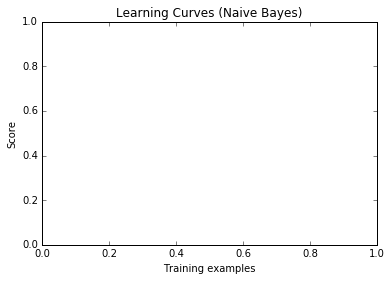